In [5]:
# -------------------- load raw data -------------------

label=[]
raw_image=[]

for line in open('./Homework/test.csv'):
#     line = f.readline()
    line = line.split(',')
#     print(line)
    if not(line[0].isdigit()):
        continue
    label.append(line[0])
    raw_image.append(line[1].split())    

    

(5500, 48, 48) [[0.00392157 0.00784314 0.00784314 ... 0.14509804 0.04313725 0.01176471]
 [0.00392157 0.         0.01568627 ... 0.15294118 0.08627451 0.02352941]
 [0.00392157 0.00392157 0.02352941 ... 0.11372549 0.14117647 0.01960784]
 ...
 [0.34509804 0.16862745 0.0745098  ... 0.78039216 0.81568627 0.80392157]
 [0.34509804 0.21960784 0.10196078 ... 0.79215686 0.81176471 0.8       ]
 [0.38431373 0.25490196 0.14117647 ... 0.79607843 0.81176471 0.79607843]]


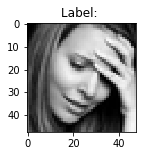

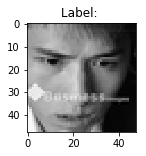

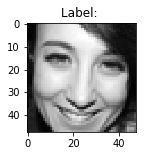

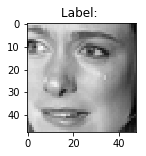

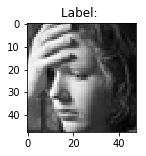

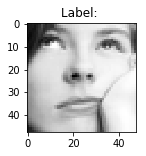

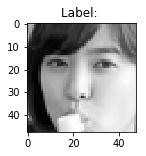

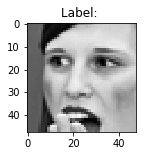

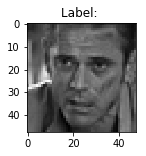

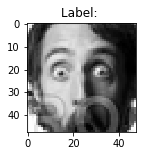

In [9]:
# --------------------- format data ----------------------
import numpy as np
# temp = np.array(raw_image).reshape(len(raw_image),48,48).astype(np.int)
# for i in range(3):
#     plot_image(temp[i])  # print raw image

# np.save("testX", temp)

temp = np.load("testX.npy")
temp = temp/255
print(temp.shape, temp[0])

for i in range(10):
    plot_image(temp[i])  # print reloaded image

# temp = np.array(label).reshape(len(label),1).astype(np.int)
# print(temp[:10])


# np.save("trainY", temp)

# temp = np.load("trainY.npy")
# print(temp.shape)
# print(temp[:10])

# 0: mad, 1:disgust, 2: terrified, 3: happy, 4: sad, 5: suprised, 6: netural

In [12]:
# ---------------- loading format data -----------------

import numpy as np
from keras.utils import np_utils  


trainX = np.load("datasets/trainX_mix.npy")
print(type(trainX[0]), trainX.shape)
trainX = trainX/255
print(trainX[0])

trainY = np.load("datasets/trainY.npy")
print(type(trainY[0]), trainY.shape)
print(trainY[:5])

trainX = trainX.reshape(trainX.shape[0], 48, 48, 1).astype('float32') 

trainY_oneHot = np_utils.to_categorical(trainY)  
print(trainY_oneHot.shape)



<class 'numpy.ndarray'> (22000, 48, 48)
[[0.19215687 0.21960784 0.25882354 ... 0.21176471 0.21176471 0.20392157]
 [0.17254902 0.21960784 0.22352941 ... 0.19215687 0.19215687 0.1764706 ]
 [0.14509805 0.14509805 0.14509805 ... 0.2        0.20392157 0.21176471]
 ...
 [0.33333334 0.33333334 0.33333334 ... 0.28627452 0.26666668 0.28235295]
 [0.31764707 0.36078432 0.35686275 ... 0.2509804  0.35686275 0.41960785]
 [0.20784314 0.32156864 0.30980393 ... 0.31764707 0.5294118  0.5372549 ]]
<class 'numpy.ndarray'> (22000, 1)
[[0]
 [0]
 [2]
 [4]
 [6]]
(22000, 7)


In [4]:
def get_class_weights(y):
    uni_val, counter = np.unique(y, return_counts=True)
    print(uni_val)
    print(counter)

    return  [float(10000/count) for count in counter]

class_weights=get_class_weights(trainY)
print(class_weights)

[0 1 2 3 4 5 6]
[2450  284 2550 4423 2954 1901 3038]
[4.081632653061225, 35.2112676056338, 3.9215686274509802, 2.2609088853719195, 3.3852403520649967, 5.260389268805891, 3.291639236339697]


In [5]:
# ------------------------shuffle dataset--------------------------

import numpy as np
def union_shuffled_copies(a, b):
    assert len(a) == len(b)
    p = np.random.permutation(len(a))
    return a[p], b[p]


# trainX, trainY = union_shuffled_copies(trainX, trainY)
# print(trainY[:5])
# trainY_oneHot = np_utils.to_categorical(trainY)  

In [22]:
# -----------------------stratified sampling --------------------------

from sklearn.model_selection import StratifiedShuffleSplit
X = np.array([[10, 2], [30, 4], [10, 20], [3, 40], [30, 40], [1, 20], [300, 4], [3, 400], [100, 2], [300, 40], 
              [31, 4], [11, 2], [3, 41], [31, 41], [1, 21], [311, 4], [3, 411], [11, 21], [311, 41], [31, 411]])
y = np.array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

def stratified_sampling(data, label, valid_percent=0.2):
    spliter = StratifiedShuffleSplit(n_splits=int(1/valid_percent), test_size=valid_percent, train_size=1-valid_percent, random_state=0)
    train_index_set, valid_index_set = [], []
    for train_index, valid_index in spliter.split(data, label):
        print("TRAIN:", train_index, len(train_index), "TEST:", valid_index, len(valid_index))
        train_index_set.append(train_index)
        valid_index_set.append(valid_index)
    return train_index_set, valid_index_set

t_ind, v_ind = stratified_sampling(trainX, trainY, valid_percent=0.2)

counter=0
for tt, vv in zip(t_ind, v_ind):
    counter+=1
    np.save("trainX_split{}".format(counter), trainX[tt])
    np.save("validX_split{}".format(counter), trainX[vv])
    np.save("trainY_split{}".format(counter), trainY[tt])
    np.save("validY_split{}".format(counter), trainY[vv])
    

TRAIN: [ 5667  3986 20006 ... 19371  9666 19362] 17600 TEST: [ 3391 10811  7669 ...  7051  4723  7756] 4400
TRAIN: [ 4707  2570  1397 ... 15023  2004 21316] 17600 TEST: [ 3549 18532  4237 ... 20005  6186  9844] 4400
TRAIN: [12111 21798  7860 ...  2119  9278  1968] 17600 TEST: [19264  1555 15213 ...  7141 18977 14496] 4400
TRAIN: [20830 16239 15366 ... 12882 19215 21811] 17600 TEST: [18250 10376 20387 ...  4351  8704  3816] 4400
TRAIN: [16788 21019  1074 ...  6093  8681  4932] 17600 TEST: [ 8851  7844  4403 ... 10306 10978  2373] 4400


(22000, 48, 48) [[ 49.  56.  66. ...  54.  54.  52.]
 [ 44.  56.  57. ...  49.  49.  45.]
 [ 37.  37.  37. ...  51.  52.  54.]
 ...
 [ 85.  85.  85. ...  73.  68.  72.]
 [ 81.  92.  91. ...  64.  91. 107.]
 [ 53.  82.  79. ...  81. 135. 137.]]
(22000, 1) [[0]
 [0]
 [2]
 [4]
 [6]]
(22000, 7)


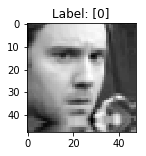

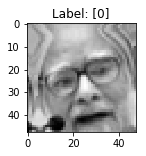

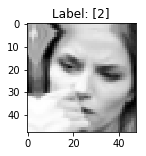

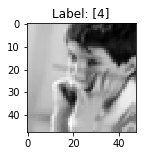

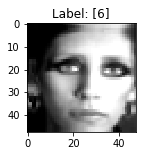

In [11]:
# ------------------------ image data augmentation --------------------------
trainX = trainX.reshape(trainX.shape[0], 48, 48, 1).astype('float32') 


from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img

# datagen = ImageDataGenerator(fill_mode='constant', rotation_range=20)
# datagen = ImageDataGenerator(fill_mode='constant', shear_range=20)
# datagen = ImageDataGenerator(fill_mode='constant', zoom_range=0.2)
# datagen = ImageDataGenerator(fill_mode='constant', brightness_range=[0.8, 1.2])
datagen =  ImageDataGenerator(rotation_range=15,
                               width_shift_range=0.1,
                               height_shift_range=0.1,
                               shear_range=0.01,
                               zoom_range=[0.9, 1.1],
                               horizontal_flip=True,
                               vertical_flip=False,
                               fill_mode='reflect',                               
                               brightness_range=[0.75, 1.25])
datagen.fit(trainX)
counter=0
trainX_aug = []
trainY_aug = []
generate_amount=len(trainX)

for bx, by in datagen.flow(trainX, trainY, batch_size=1, shuffle=False):
    counter+=1
    if counter>generate_amount: break

    bx=np.squeeze(bx, axis=3)
#     bx=np.squeeze(bx, axis=0)
    trainX_aug.append(bx)
    trainY_aug.append(by)

trainX_aug = np.concatenate(trainX_aug, axis=0).reshape(generate_amount, 48, 48)
print(trainX_aug.shape, trainX_aug[0])
# for t in temp:
#     plot_image(t)
trainY_aug = np.vstack(trainY_aug)
print(trainY_aug.shape, trainY_aug[:5])

np.save("datasets/trainX_mix", trainX_aug)

trainY_oneHot_aug = np_utils.to_categorical(trainY_aug)      
print(trainY_oneHot_aug.shape)
for i in range(5):
    plot_image(trainX_aug[i].reshape(48, 48), trainY_aug[i])


(22000, 48, 48)


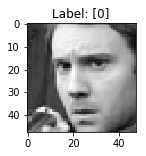

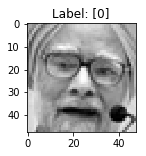

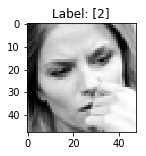

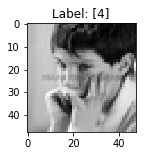

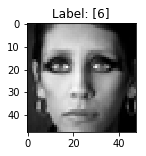

In [79]:
# -------------------- horizontal/vertical flip ------------------------

# trainX = np.load("datasets/trainX_split5.npy")
# print(trainX.shape)
# trainY = np.load("datasets/trainY_split5.npy")

trainX_aug = trainX[:, :, ::-1]  # horizontal, vertical for axis=1
trainY_aug = []


trainX_aug = np.concatenate(trainX_aug, axis=0).reshape(generate_amount, 48, 48).astype('float32') 
print(trainX_aug.shape)
# trainY_aug = np.vstack(trainY_aug)
# print(trainY_aug.shape, trainY_aug[:5])

np.save("datasets/trainX_hflip", trainX_aug)

# trainY_oneHot_aug = np_utils.to_categorical(trainY_aug)      
# print(trainY_oneHot_aug.shape)
for i in range(5):
    plot_image(trainX_aug[i].reshape(48, 48), trainY[i])



[[2]
 [3]
 [3]
 [6]
 [4]]
(17600, 48, 48) [[0.07058824 0.10980392 0.14509804 ... 0.32941176 0.29803922 0.20392157]
 [0.08627451 0.10980392 0.15294118 ... 0.18823529 0.30196078 0.35294118]
 [0.09803922 0.08235294 0.21568627 ... 0.17254902 0.30196078 0.52156863]
 ...
 [0.6        0.58431373 0.6        ... 0.88627451 0.90196078 0.89803922]
 [0.59215686 0.58431373 0.59607843 ... 0.88627451 0.90196078 0.89803922]
 [0.58431373 0.57647059 0.57647059 ... 0.89019608 0.90196078 0.89411765]]


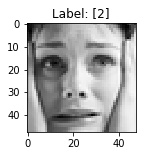

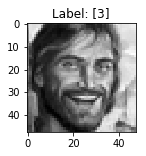

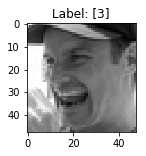

(17600, 48, 48) [[0.20392157 0.29803923 0.32941177 ... 0.14509805 0.10980392 0.07058824]
 [0.3529412  0.3019608  0.1882353  ... 0.15294118 0.10980392 0.08627451]
 [0.52156866 0.3019608  0.17254902 ... 0.21568628 0.08235294 0.09803922]
 ...
 [0.8980392  0.9019608  0.8862745  ... 0.6        0.58431375 0.6       ]
 [0.8980392  0.9019608  0.8862745  ... 0.59607846 0.58431375 0.5921569 ]
 [0.89411765 0.9019608  0.8901961  ... 0.5764706  0.5764706  0.58431375]]


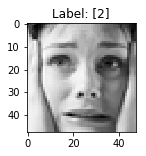

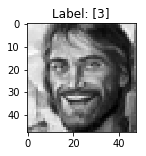

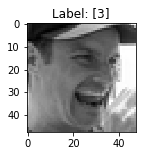

(17600, 48, 48) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


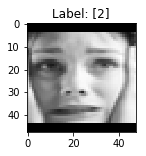

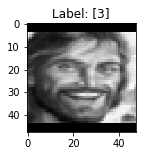

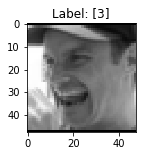

(17600, 48, 48) [[0.16153963 0.22809455 0.41478157 ... 0.         0.         0.        ]
 [0.18618234 0.2960376  0.49603865 ... 0.         0.         0.        ]
 [0.18997812 0.3495406  0.545517   ... 0.         0.         0.        ]
 ...
 [0.         0.         0.         ... 0.8957737  0.9042681  0.8969535 ]
 [0.         0.         0.         ... 0.89186406 0.9010799  0.8959091 ]
 [0.         0.         0.         ... 0.88946974 0.89903414 0.89388406]]


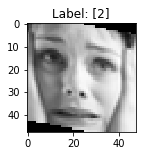

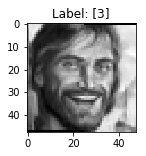

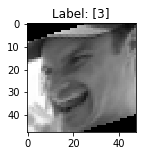

(17600, 48, 48) [[0.         0.08819781 0.11748404 ... 0.         0.         0.        ]
 [0.         0.09398194 0.11335035 ... 0.17016743 0.29082978 0.28793108]
 [0.         0.10415463 0.10261806 ... 0.10290465 0.21070404 0.32327732]
 ...
 [0.58704454 0.5932177  0.62680155 ... 0.8959518  0.8964024  0.        ]
 [0.579963   0.5800908  0.61039233 ... 0.89747727 0.89916235 0.        ]
 [0.         0.         0.         ... 0.8982985  0.89826405 0.        ]]


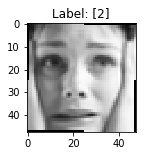

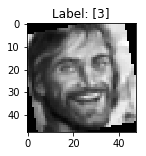

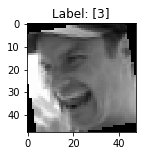

In [11]:
from keras.utils import np_utils  

trainY = np.load("datasets/trainY_split5.npy")
print(trainY[:5])
trainY_oneHot = np_utils.to_categorical(trainY)  

trainX=np.load("datasets/trainX_split5.npy")
print(trainX.shape, trainX[0])

for i in range(3):            
    plot_image(trainX[i].reshape(48, 48), trainY[i])


# trainY_oneHot_aug = np_utils.to_categorical(trainY_aug)      
# print(trainY_oneHot_aug.shape)
trainX_aug1=np.load("datasets/trainX_split_hflip5.npy")
print(trainX_aug1.shape, trainX_aug1[0])
for i in range(3):
    plot_image(trainX_aug1[i].reshape(48, 48), trainY[i])

trainX_aug2=np.load("datasets/trainX_split_zoom5.npy")
print(trainX_aug2.shape, trainX_aug2[0])
for i in range(3):
    plot_image(trainX_aug2[i].reshape(48, 48), trainY[i])

trainX_aug3=np.load("datasets/trainX_split_shear5.npy")
print(trainX_aug3.shape, trainX_aug3[0])
for i in range(3):
    plot_image(trainX_aug3[i].reshape(48, 48), trainY[i])

trainX_aug4=np.load("datasets/trainX_split_rotate5.npy")
print(trainX_aug4.shape, trainX_aug4[0])
for i in range(3):
    plot_image(trainX_aug4[i].reshape(48, 48), trainY[i])

    
trainX_aug1 = trainX_aug1.reshape(trainX_aug1.shape[0], 48, 48, 1).astype('float32')     
trainX_aug2 = trainX_aug2.reshape(trainX_aug2.shape[0], 48, 48, 1).astype('float32')     
trainX_aug3 = trainX_aug3.reshape(trainX_aug3.shape[0], 48, 48, 1).astype('float32')     
trainX_aug4 = trainX_aug4.reshape(trainX_aug4.shape[0], 48, 48, 1).astype('float32')     
trainX = trainX.reshape(trainX.shape[0], 48, 48, 1).astype('float32')     

In [1]:
# ------------------------ plotting function --------------------------

%matplotlib inline

import os  
import matplotlib.pyplot as plt  

def plot_image(image, label=""):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)
    plt.title("Label: {}".format(label))
    plt.imshow(image, cmap='gray')  
    plt.show()  



KeyboardInterrupt: 

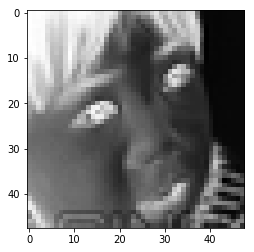

In [11]:
# ------------------------save array to image--------------------------

for ind in range(len(trainX)):
    plt.imshow(trainX[ind], cmap='binary')  
    plt.savefig("./images/sample_{}".format(str(ind)))

In [1]:
from keras.models import Sequential  
from keras.layers import Dense, Dropout, Flatten, Activation 
from keras.layers import Conv2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers.normalization import BatchNormalization  
from keras import regularizers
    
model = Sequential()  
# Create CN layer 1
model.add(Conv2D(filters=8,  
                 kernel_size=(3,3),  
                 padding='same',  
                 input_shape=(48, 48, 1),
#                  kernel_initializer='he_normal', bias_initializer='zeros', 
#                  kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  

model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=8,  
                 kernel_size=(3,3),  
                 padding='same',
#                 kernel_initializer='he_normal', bias_initializer='zeros', 
#                 kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  

model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
# Create Max-Pool 1  
model.add(MaxPooling2D(pool_size=(2,2)))  
# Add Dropout layer 1 
model.add(Dropout(0.25))

  
# Create CN layer 2
model.add(Conv2D(filters=16,  
                kernel_size=(3,3),  
                padding='same',
#                 kernel_initializer='he_normal', bias_initializer='zeros', 
#                 kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  

model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=16,  
                kernel_size=(3,3),  
                padding='same',
#                 kernel_initializer='he_normal', bias_initializer='zeros', 
#                 kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  

model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
# Create Max-Pool 2  
model.add(MaxPooling2D(pool_size=(2,2)))  
# Add Dropout layer 2 
model.add(Dropout(0.25))

# Create CN layer 3 
model.add(Conv2D(filters=32,  
                kernel_size=(3,3),  
                padding='same',
#                 kernel_initializer='he_normal', bias_initializer='zeros', 
#                 kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  

model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Conv2D(filters=32,  
                kernel_size=(3,3),  
                padding='same',
#                 kernel_initializer='he_normal', bias_initializer='zeros', 
#                 kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  

model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
# Create Max-Pool 3  
model.add(MaxPooling2D(pool_size=(2,2)))  
# Add Dropout layer 3
model.add(Dropout(0.25))


model.add(Flatten())  

model.add(Dense(128, activation='relu'))  
model.add(Dropout(0.5))  
'''
model.add(Conv2D(filters=128,  
                kernel_size=(1,1),  
                padding='same',
#                 kernel_initializer='he_normal', bias_initializer='zeros', 
#                 kernel_regularizer=regularizers.l2(0.01), bias_regularizer=None
                ))  
model.add(Activation('relu'))
model.add(BatchNormalization(axis=-1))
model.add(Dropout(0.5))

model.add(Flatten())  
'''
model.add(Dense(7, activation='softmax'))  

model.summary()  
print("")  



Using TensorFlow backend.


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 48, 48, 8)         80        
_________________________________________________________________
activation_1 (Activation)    (None, 48, 48, 8)         0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 48, 48, 8)         32        
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 8)         584       
_________________________________________________________________
activation_2 (Activation)    (None, 48, 48, 8)         0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 48, 48, 8)         32        
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 24, 24, 8)         0         
__________

In [33]:
# ------------------------ model training --------------------------

from keras import optimizers

# adam = optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=10e-8, decay=0.0, amsgrad=False)
# 定義訓練方式  
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  

# 開始訓練  
train_history = model.fit(x=trainX, y=trainY_oneHot, validation_split=0.2, class_weight=class_weights,
                          epochs=50, batch_size=100, verbose=2)  

Train on 14080 samples, validate on 3520 samples
Epoch 1/50
 - 232s - loss: 1.9562 - acc: 0.2340 - val_loss: 1.7739 - val_acc: 0.2545
Epoch 2/50
 - 236s - loss: 1.7949 - acc: 0.2580 - val_loss: 1.7383 - val_acc: 0.2594
Epoch 3/50
 - 236s - loss: 1.7207 - acc: 0.2928 - val_loss: 1.6156 - val_acc: 0.3659
Epoch 4/50
 - 242s - loss: 1.6687 - acc: 0.3235 - val_loss: 1.5981 - val_acc: 0.3932
Epoch 5/50
 - 241s - loss: 1.6278 - acc: 0.3393 - val_loss: 1.5575 - val_acc: 0.4048
Epoch 6/50
 - 247s - loss: 1.5926 - acc: 0.3602 - val_loss: 1.5970 - val_acc: 0.3969
Epoch 7/50
 - 234s - loss: 1.5649 - acc: 0.3755 - val_loss: 1.5021 - val_acc: 0.4222
Epoch 8/50
 - 238s - loss: 1.5166 - acc: 0.3965 - val_loss: 1.4110 - val_acc: 0.4591
Epoch 9/50
 - 241s - loss: 1.4866 - acc: 0.4104 - val_loss: 1.3821 - val_acc: 0.4659
Epoch 10/50
 - 239s - loss: 1.4696 - acc: 0.4219 - val_loss: 1.3911 - val_acc: 0.4520
Epoch 11/50
 - 236s - loss: 1.4439 - acc: 0.4383 - val_loss: 1.3673 - val_acc: 0.4636
Epoch 12/50
 -

KeyboardInterrupt: 

In [13]:
# ------------------------ augmentation testing--------------------------

from keras import optimizers


model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])  
# trainX_aug = trainX_aug.reshape(trainX_aug.shape[0], 48, 48, 1).astype('float32') 
# print(trainX.shape, trainX_aug.shape)
tempX = np.vstack((trainX, trainX_aug1, trainX_aug2, trainX_aug3, trainX_aug4))
tempY_oneHot = np.vstack((trainY_oneHot, trainY_oneHot, trainY_oneHot, trainY_oneHot, trainY_oneHot))
print(tempX.shape, tempY_oneHot.shape)
train_history = model.fit(x=tempX, y=tempY_oneHot, validation_split=0.2, class_weight=class_weights,
                          epochs=50, batch_size=100, verbose=2)



(88000, 48, 48, 1) (88000, 7)
Train on 70400 samples, validate on 17600 samples
Epoch 1/50
 - 1190s - loss: 1.7817 - acc: 0.2683 - val_loss: 1.6593 - val_acc: 0.3561
Epoch 2/50
 - 1183s - loss: 1.6358 - acc: 0.3316 - val_loss: 1.4913 - val_acc: 0.4013
Epoch 3/50
 - 1160s - loss: 1.5577 - acc: 0.3619 - val_loss: 1.4333 - val_acc: 0.4288
Epoch 4/50
 - 1137s - loss: 1.5043 - acc: 0.3888 - val_loss: 1.4342 - val_acc: 0.4264
Epoch 5/50
 - 1200s - loss: 1.4681 - acc: 0.4078 - val_loss: 1.3484 - val_acc: 0.4552
Epoch 6/50
 - 1164s - loss: 1.4317 - acc: 0.4263 - val_loss: 1.3551 - val_acc: 0.4578
Epoch 7/50
 - 1111s - loss: 1.3881 - acc: 0.4494 - val_loss: 1.2885 - val_acc: 0.5031
Epoch 8/50
 - 1116s - loss: 1.3284 - acc: 0.4767 - val_loss: 1.1949 - val_acc: 0.5421
Epoch 9/50
 - 1126s - loss: 1.2985 - acc: 0.4937 - val_loss: 1.2829 - val_acc: 0.5122
Epoch 10/50
 - 1113s - loss: 1.2685 - acc: 0.5055 - val_loss: 1.1763 - val_acc: 0.5610
Epoch 11/50
 - 1117s - loss: 1.2378 - acc: 0.5223 - val_los

In [45]:

validX= np.load("datasets/validX_split5.npy")
validX = validX.reshape(validX.shape[0], 48, 48, 1).astype('float32')     
# print(type(trainX[0]), trainX.shape)
# print(type(validX[0]), validX.shape)
# trainX = trainX/255
# print(trainX[0])

validY = np.load("datasets/validY_split5.npy")
validY_onehot = np_utils.to_categorical(validY)  
print(type(trainY[0]), trainY.shape)
print(type(validY[0]), validY.shape)
loss, accuracy = model1.evaluate(x=validX, y=validY_onehot, batch_size=100, verbose=1)
print("\nLoss: %.2f, Accuracy: %.2f%%" % (loss, accuracy*100))

<class 'numpy.ndarray'> (17600, 1)
<class 'numpy.ndarray'> (4400, 1)
4400/4400 [==============================] - 20s 5ms/step

Loss: 1.12, Accuracy: 63.09%


['angry', 'disgust', 'terrified', 'happy', 'sad', 'suprised', 'netural']
[[305   1  49  49 103  10  95]
 [ 13  31   3   5  13   1   5]
 [ 63   2 237  32 162  66  76]
 [ 30   0  18 941  32  23  62]
 [ 83   0  67  35 405  10 138]
 [ 25   0  40  29   9 351  21]
 [ 41   0  17  70 109  17 506]]
DescribeResult(nobs=1624, minmax=(4.3291684e-06, 1.862325), mean=1.0494572, variance=0.18009771, skewness=-0.6378774642944336, kurtosis=-0.2997765421890297)
0.6309090909090909
DescribeResult(nobs=2776, minmax=(3.381468e-15, 1.8270233), mean=0.53503656, variance=0.26941445, skewness=0.5303586721420288, kurtosis=-1.086134017079793)
right prediction probability


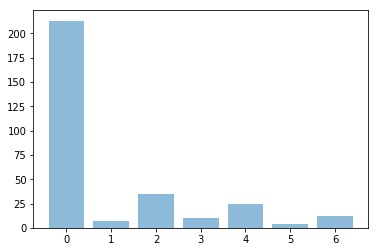

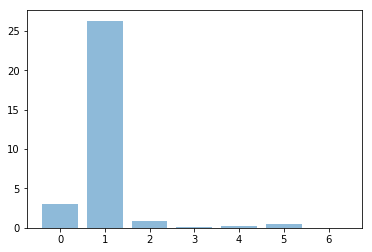

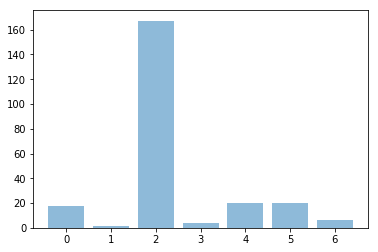

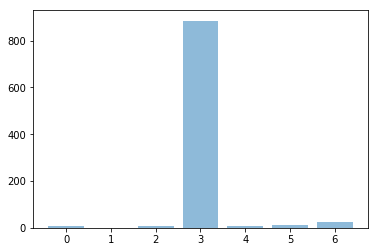

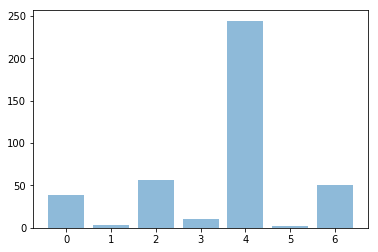

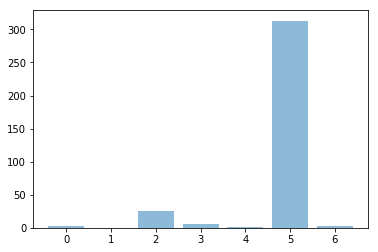

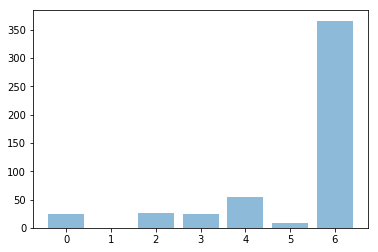

[[2.13083952e+02 7.08481314e+00 3.45300394e+01 1.00081420e+01
  2.43885236e+01 3.99628634e+00 1.19082397e+01]
 [3.06562711e+00 2.63182972e+01 8.97870077e-01 5.40026256e-02
  1.97443674e-01 4.31409391e-01 3.53507509e-02]
 [1.76214888e+01 1.46153911e+00 1.67234852e+02 4.21267441e+00
  2.02071507e+01 2.02026390e+01 6.05965575e+00]
 [5.90264502e+00 4.88730256e-02 6.87512051e+00 8.85401506e+02
  7.31843645e+00 1.19133965e+01 2.35400290e+01]
 [3.89822937e+01 3.14004575e+00 5.63807434e+01 9.92923372e+00
  2.44566753e+02 2.00940582e+00 4.99915251e+01]
 [2.60755187e+00 2.04832246e-02 2.49875155e+01 5.83867067e+00
  1.36167022e+00 3.13124027e+02 3.06008090e+00]
 [2.51929576e+01 4.80627835e-01 2.62936174e+01 2.50069341e+01
  5.53249348e+01 7.60802762e+00 3.66092901e+02]] [[ 43.78132439   2.59758678  54.79468622  44.55991167  79.08084321
   13.05678     69.12886746]
 [ 11.66356879   3.36661413   4.93894346   4.66031506   9.15887166
    1.53210823   4.67957784]
 [ 67.56278162   4.71633864  64.05336

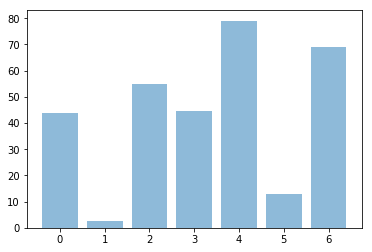

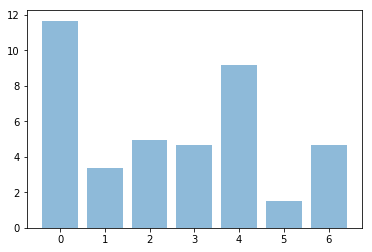

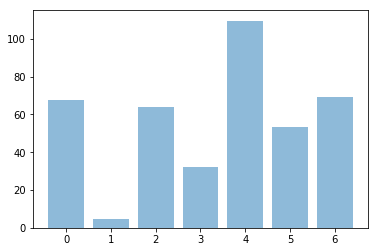

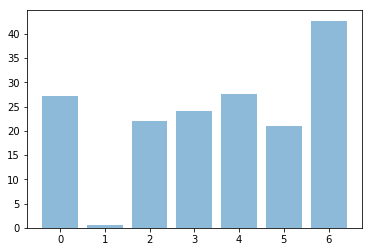

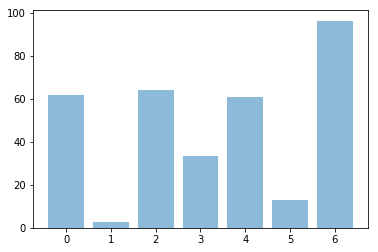

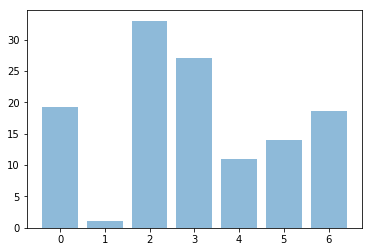

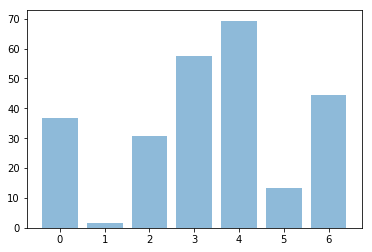

In [73]:
import h5py
from keras.models import load_model, save_model
# model1.save('models/09191346_dataAugAll_model5.h5')

# model = load_model('models/09211011_dataAugAll_model5.h5')
prediction_prob = model1.predict(validX[:], batch_size=None, verbose=0, steps=None)
prediction = []
wrong_ind = []
right_ind = []
# print(validY.shape)
for a, b in zip(validY[:], prediction_prob):
    format_b = np.round((b-np.min(b))/(np.max(b)-np.min(b)), 2)
#     print(a, format_b, np.argmax(b))
    prediction.append(np.argmax(b))
# print(len(prediction), validY.shape)
from sklearn.metrics import confusion_matrix
labels=['angry', 'disgust', 'terrified', 'happy', 'sad', 'suprised', 'netural']
wrong_prob=np.zeros((7, 7))
right_prob=np.zeros((7, 7))
print(labels)
print(confusion_matrix(validY[:], prediction))

for i, (a, b) in enumerate(zip(validY[:], prediction)):
#     print(a[0], type(a[0]), b, type(b))
    if a[0]!=b: 
        wrong_ind.append(i)
        wrong_prob[a[0]] += prediction_prob[i]
                
    else:
        right_ind.append(i)
        right_prob[a[0]] += prediction_prob[i]
        
    
import scipy as sc
temp=[]
for i in wrong_ind:
#     print(prediction_prob[i])
    temp.append(sc.stats.entropy(prediction_prob[i]))

print(sc.stats.describe(temp))
print(len(right_ind)/len(prediction))
temp=[]    
for j in right_ind:    
#     print(prediction_prob[j])
    temp.append(sc.stats.entropy(prediction_prob[j]))

print(sc.stats.describe(temp))



import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline
print('right prediction probability')
for arr in right_prob:    
    plt.bar(range(len(arr)), arr, align='center', alpha=0.5)
    plt.show()
print(right_prob, wrong_prob)
print('wrong prediction probability')
for arr in wrong_prob:    
    plt.bar(range(len(arr)), arr, align='center', alpha=0.5)
    plt.show()


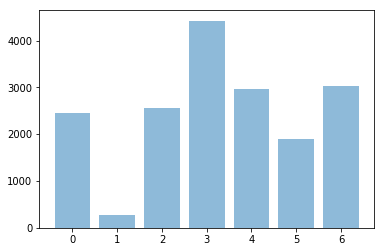

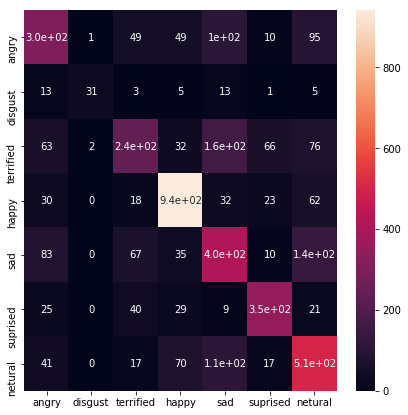

In [4]:
plt.bar(range(7), [2450, 284, 2550, 4423, 2954, 1901, 3038], align='center', alpha=0.5)
plt.show()

import pandas as pd
import seaborn as sn
labels=['angry', 'disgust', 'terrified', 'happy', 'sad', 'suprised', 'netural']
array = [
 [305,   1,  49,  49, 103,  10,  95],
 [ 13,  31,   3,   5,  13,   1,   5],
 [ 63,   2, 237,  32, 162,  66,  76],
 [ 30,   0,  18, 941,  32,  23,  62],
 [ 83,   0,  67,  35, 405,  10, 138],
 [ 25,   0,  40,  29,   9, 351,  21],
 [ 41,   0,  17,  70, 109,  17, 506]]
df_cm = pd.DataFrame(array, index = [i for i in labels],
                  columns = [i for i in labels])
plt.figure(figsize = (7,7))
sn.heatmap(df_cm, annot=True)

In [11]:
# ------------------- saving model ---------------------
import h5py
from keras.models import load_model, save_model
# model.save('models/09251301_dataAugMix_model.h5')



Using TensorFlow backend.


In [14]:
# ------------------- loading model --------------------
model = load_model('models/dataAugAll_29_model.h5')
# from keras.utils.vis_utils import plot_model
# plot_model(model, to_file='model_plot0.png', show_shapes=True, show_layer_names=True)
# train_history = model.fit(x=trainX, y=trainY_oneHot, validation_split=0.2, class_weight=class_weights,
#                           epochs=3, batch_size=100, verbose=2)  
testX = np.load("testX.npy")
testX = testX/255
testX = testX.reshape(testX.shape[0], 48, 48, 1).astype('float32')     
prediction_prob = model.predict(testX, batch_size=None, verbose=0, steps=None)
prediction = np.argmax(prediction_prob, axis=1)
print(prediction.shape, prediction_prob[:10], prediction[:10])
np.savetxt("prediction.csv", prediction, delimiter=",")

(5500,) [[1.14144869e-01 4.32113791e-03 1.31218374e-01 3.89242135e-02
  5.32766879e-01 3.90575193e-02 1.39567092e-01]
 [1.03361540e-01 7.28163926e-04 2.38031492e-01 1.16284544e-04
  5.77989340e-01 3.19050043e-04 7.94541538e-02]
 [2.49003733e-07 7.62509467e-13 1.60047457e-05 9.96064484e-01
  6.58516583e-05 5.97304097e-06 3.84742487e-03]
 [3.30760740e-02 6.95384108e-03 1.07587121e-01 9.76799875e-02
  6.64402962e-01 8.40183161e-03 8.18981752e-02]
 [4.66185797e-04 7.62976015e-07 9.47156549e-02 8.21269077e-06
  9.03487921e-01 4.24940081e-05 1.27863383e-03]
 [1.78935323e-02 5.22222172e-06 7.54295848e-03 6.69938445e-01
  1.97526142e-02 1.13205640e-02 2.73546666e-01]
 [9.60236937e-02 4.83053364e-03 8.71459618e-02 7.46445805e-02
  2.01716617e-01 6.56745490e-03 5.29071152e-01]
 [9.24221650e-02 2.39441101e-03 3.03101182e-01 3.32994871e-02
  2.76545826e-02 5.15428364e-01 2.56997198e-02]
 [1.33722484e-01 6.16982928e-04 1.76309556e-01 1.46211893e-03
  5.47957778e-01 4.41059843e-03 1.35520428e-01]
 [

[[0]
 [0]
 [2]
 [4]
 [6]]
(22000, 48, 48) [[ 70  80  82 ...  52  43  41]
 [ 65  61  58 ...  56  52  44]
 [ 50  43  54 ...  49  56  47]
 ...
 [ 91  65  42 ...  72  56  43]
 [ 77  82  79 ... 105  70  46]
 [ 77  72  84 ... 106 109  82]]
[0 1 2 3 4 5 6]
[3062  355 3188 5529 3692 2376 3798]
[3.2658393207054215, 28.169014084507044, 3.136762860727729, 1.8086453246518357, 2.7085590465872156, 4.2087542087542085, 2.6329647182727753]


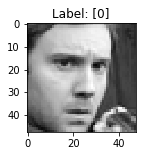

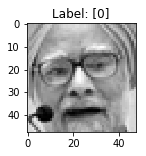

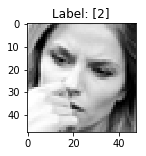

(22000, 48, 48) [[0.16078432 0.16862746 0.20392157 ... 0.32156864 0.3137255  0.27450982]
 [0.17254902 0.20392157 0.21960784 ... 0.22745098 0.23921569 0.25490198]
 [0.18431373 0.21960784 0.19215687 ... 0.21176471 0.16862746 0.19607843]
 ...
 [0.16862746 0.21960784 0.28235295 ... 0.16470589 0.25490198 0.35686275]
 [0.18039216 0.27450982 0.4117647  ... 0.30980393 0.32156864 0.3019608 ]
 [0.32156864 0.42745098 0.41568628 ... 0.32941177 0.28235295 0.3019608 ]]


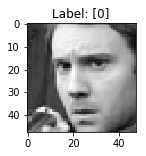

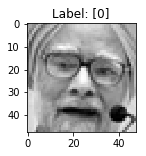

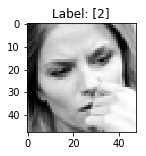

(22000, 48, 48) [[ 95. 109. 111. ...  70.  58.  55.]
 [ 87.  83.  78. ...  75.  70.  59.]
 [ 67.  58.  73. ...  66.  75.  64.]
 ...
 [123.  87.  57. ...  97.  75.  58.]
 [104. 111. 106. ... 143.  95.  61.]
 [104.  97. 114. ... 144. 148. 111.]]


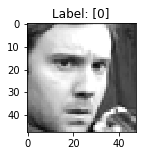

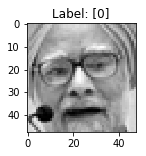

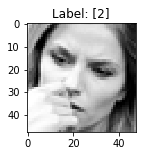

(22000, 48, 48) [[0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]


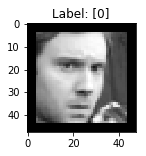

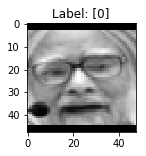

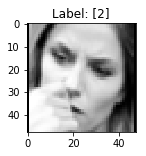

(22000, 48, 48) [[0.         0.         0.         ... 0.20055935 0.21414663 0.18443635]
 [0.         0.         0.         ... 0.1707026  0.19253033 0.17900851]
 [0.27660656 0.30512708 0.3003472  ... 0.19587338 0.20398857 0.17570804]
 ...
 [0.17445579 0.18075493 0.15905032 ... 0.41208994 0.38656917 0.30066615]
 [0.2779221  0.15618332 0.16775464 ... 0.         0.         0.        ]
 [0.3470057  0.25689042 0.19221446 ... 0.         0.         0.        ]]


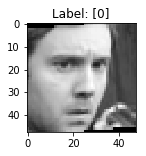

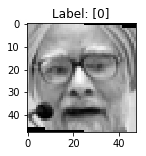

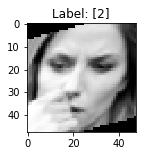

(22000, 48, 48) [[0.         0.         0.23126175 ... 0.         0.         0.        ]
 [0.         0.         0.1722268  ... 0.         0.         0.        ]
 [0.         0.         0.16493239 ... 0.21433377 0.21787977 0.2031029 ]
 ...
 [0.31346163 0.31115833 0.27865502 ... 0.24202928 0.         0.        ]
 [0.         0.         0.         ... 0.21809235 0.         0.        ]
 [0.         0.         0.         ... 0.2614161  0.         0.        ]]


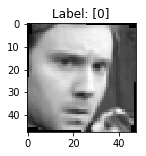

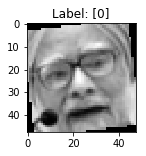

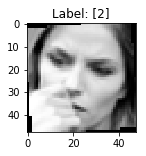

(132000, 48, 48, 1) (132000, 7)
Train on 105600 samples, validate on 26400 samples
Epoch 1/50


KeyboardInterrupt: 

In [2]:
%matplotlib inline

import os  
import matplotlib.pyplot as plt  

def plot_image(image, label=""):  
    fig = plt.gcf()  
    fig.set_size_inches(2,2)
    plt.title("Label: {}".format(label))
    plt.imshow(image, cmap='gray')  
    plt.show()  

from keras.utils import np_utils
import numpy as np

trainY = np.load("datasets/trainY.npy")
print(trainY[:5])
trainY_oneHot = np_utils.to_categorical(trainY)

trainX=np.load("datasets/trainX.npy")
print(trainX.shape, trainX[0])

def get_class_weights(y):
    uni_val, counter = np.unique(y, return_counts=True)
    print(uni_val)
    print(counter)

    return  [float(10000/count) for count in counter]

class_weights=get_class_weights(trainY)
print(class_weights)

for i in range(3):
    plot_image(trainX[i].reshape(48, 48), trainY[i])


# trainY_oneHot_aug = np_utils.to_categorical(trainY_aug)
# print(trainY_oneHot_aug.shape)
trainX_aug1=np.load("datasets/trainX_hflip.npy")
print(trainX_aug1.shape, trainX_aug1[0])
for i in range(3):
    plot_image(trainX_aug1[i].reshape(48, 48), trainY[i])

trainX_aug2=np.load("datasets/trainX_bright.npy")
print(trainX_aug2.shape, trainX_aug2[0])
for i in range(3):
    plot_image(trainX_aug2[i].reshape(48, 48), trainY[i])

trainX_aug3=np.load("datasets/trainX_zoom.npy")
print(trainX_aug3.shape, trainX_aug3[0])
for i in range(3):
    plot_image(trainX_aug3[i].reshape(48, 48), trainY[i])

trainX_aug4=np.load("datasets/trainX_shear.npy")
print(trainX_aug4.shape, trainX_aug4[0])
for i in range(3):
    plot_image(trainX_aug4[i].reshape(48, 48), trainY[i])

trainX_aug5=np.load("datasets/trainX_rotate.npy")
print(trainX_aug5.shape, trainX_aug5[0])
for i in range(3):
    plot_image(trainX_aug5[i].reshape(48, 48), trainY[i])



trainX_aug1 = trainX_aug1.reshape(trainX_aug1.shape[0], 48, 48, 1).astype('float32')
trainX_aug2 = trainX_aug2.reshape(trainX_aug2.shape[0], 48, 48, 1).astype('float32')
trainX_aug3 = trainX_aug3.reshape(trainX_aug3.shape[0], 48, 48, 1).astype('float32')
trainX_aug4 = trainX_aug4.reshape(trainX_aug4.shape[0], 48, 48, 1).astype('float32')
trainX_aug5 = trainX_aug5.reshape(trainX_aug5.shape[0], 48, 48, 1).astype('float32')
trainX = trainX.reshape(trainX.shape[0], 48, 48, 1).astype('float32')


import h5py
from keras.models import load_model, save_model
model = load_model('models/09211011_dataAugAll_model5.h5')


tempX = np.vstack((trainX, trainX_aug1, trainX_aug2, trainX_aug3, trainX_aug4, trainX_aug5))
tempY_oneHot = np.vstack((trainY_oneHot, trainY_oneHot, trainY_oneHot, trainY_oneHot, trainY_oneHot, trainY_oneHot))
print(tempX.shape, tempY_oneHot.shape)
train_history = model.fit(x=tempX, y=tempY_oneHot, validation_split=0.2, class_weight=class_weights,
                          epochs=50, batch_size=100, verbose=2)

model.save('models/092X_dataAugAll_model.h5')    
    
    